In [1]:
import pandas as pd
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

We began with importing the necessary libraries

In [2]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


To get an inital view of our dataset, we decide to display the first 5 rows.

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
df = df.drop_duplicates()

In [5]:
# Selecting all relevant columns (includes features and labels)
selected_columns_df = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak", "slope","ca","thal","target"]]

# Dropping any incomplete columns (columns with nan values)
selected_columns_df = selected_columns_df.dropna()

heart_features_df = selected_columns_df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "exang", "oldpeak", "slope","ca","thal"]]
heart_features_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,0,2.3,0,0,1
1,37,1,2,130,250,0,1,0,3.5,0,0,2
2,41,0,1,130,204,0,0,0,1.4,2,0,2
3,56,1,1,120,236,0,1,0,0.8,2,0,2
4,57,0,0,120,354,0,1,1,0.6,2,0,2


Features we used:
* Age: Integer
* Sex: Categorical
* Chest Pain: Categorical
* Resting blood pressure: Integer
* Cholesterol: Integer
* Fasting Blood Sugar: Categorical
* Resting electrocardiograph results: Categorical
* Thalach: Integer
* Exercise-induced Angina: Categorical
* Oldpeak: Float
* Slope: Categorical
* Number of Major Vessels (ca): Integer
* Thalassemia: Categorical

In [6]:
# Defining our label
target_df  = selected_columns_df[['target']]
target_df.head()

,target
0,1
1,1
2,1
3,1
4,1


Label
* Target: Categorical

# Feature Engineering

In [7]:
scaler = MinMaxScaler()
all_columns = heart_features_df.columns

heart_features_df[all_columns] = scaler.fit_transform(heart_features_df[all_columns])
heart_features_df.head()

/var/folders/t8/0sdn50jj4vn_23gxhzh3v51w0000gn/T/ipykernel_66816/851435905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_features_df[all_columns] = scaler.fit_transform(heart_features_df[all_columns])


,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,1.0,0.096774,1.0,0.0,0.666667


# Feature Ablation Test
Using Decision Tree & Ensemble Methods

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# First extract our test data and store it in x_test, y_test
features = heart_features_df.to_numpy()
labels = target_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# set k = 5
k = 10

kfold_spliiter = KFold(n_splits=k)

folds_data = [] # this is an inefficient way but still do it

fold = 1
for train_index, validation_index in kfold_spliiter.split(_x):
    x_train , x_valid = _x[train_index,:],_x[validation_index,:]
    y_train , y_valid = _y[train_index,:] , _y[validation_index,:]
    print (f"Fold {fold} training data shape = {(x_train.shape,y_train.shape)}")
    print (f"Fold {fold} validation data shape = {(x_valid.shape,y_valid.shape)}")
    fold+=1
    folds_data.append((x_train,y_train,x_valid,y_valid))

Fold 1 training data shape = ((243, 12), (243, 1))
Fold 1 validation data shape = ((28, 12), (28, 1))
Fold 2 training data shape = ((244, 12), (244, 1))
Fold 2 validation data shape = ((27, 12), (27, 1))
Fold 3 training data shape = ((244, 12), (244, 1))
Fold 3 validation data shape = ((27, 12), (27, 1))
Fold 4 training data shape = ((244, 12), (244, 1))
Fold 4 validation data shape = ((27, 12), (27, 1))
Fold 5 training data shape = ((244, 12), (244, 1))
Fold 5 validation data shape = ((27, 12), (27, 1))
Fold 6 training data shape = ((244, 12), (244, 1))
Fold 6 validation data shape = ((27, 12), (27, 1))
Fold 7 training data shape = ((244, 12), (244, 1))
Fold 7 validation data shape = ((27, 12), (27, 1))
Fold 8 training data shape = ((244, 12), (244, 1))
Fold 8 validation data shape = ((27, 12), (27, 1))
Fold 9 training data shape = ((244, 12), (244, 1))
Fold 9 validation data shape = ((27, 12), (27, 1))
Fold 10 training data shape = ((244, 12), (244, 1))
Fold 10 validation data shape 

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


lr_vanilla = LogisticRegression(penalty="none") # OR penalty="none" depending on your sklearn version
svm_linear = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=23) # some random seed for reproducibility
grad_boost = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[("1",lr_vanilla),("2",svm_linear),("3",dt)])

all_models = {"lr":lr_vanilla, 
              "svm":svm_linear,
              "decision_tree":dt,
              "random_forest":rf,
              "grad_boost":grad_boost,
              "voting":voting}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['lr', 'svm', 'decision_tree', 'random_forest', 'grad_boost', 'voting'])


In [10]:
from sklearn.model_selection import cross_val_score

# First extract our test data and store it in x_test, y_test
features = heart_features_df.to_numpy()
labels = target_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5 # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

Mean cross validation accuracy for model lr = 0.8154882154882156
Mean cross validation accuracy for model svm = 0.8191919191919194
Mean cross validation accuracy for model decision_tree = 0.7782491582491582
Mean cross validation accuracy for model random_forest = 0.8449158249158251
Mean cross validation accuracy for model grad_boost = 0.8263973063973064
Mean cross validation accuracy for model voting = 0.8154882154882154
Best model is random_forest with 5-fold accuracy of 0.8449158249158251


/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

After getting the cross validation accuracies for each of our models, we decide that the random_forest is the best model with highest accuracy.

In [11]:
from sklearn.metrics import accuracy_score

# Let's fit the best model again with train+valid data
# This is the model we are gonna ship/deploy to practice

best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

Test accuracy for model 0.8064516129032258


In [12]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = RandomForestClassifier()

feature_names = heart_features_df.columns

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    # Remmeber? We have the train + valid data in the above section?
    # We just remove the feature by not selecting the column from the index i

    x_ablated = numpy.delete(_x,i,axis=1) # axis = 1 means columns
    
    cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score

Removing feature age
Mean cross validation accuracy = 0.8412121212121212
Removing feature sex
Mean cross validation accuracy = 0.8340067340067341
Removing feature cp
Mean cross validation accuracy = 0.8264646464646465
Removing feature trestbps
Mean cross validation accuracy = 0.8338047138047138
Removing feature chol
Mean cross validation accuracy = 0.8486195286195285
Removing feature fbs
Mean cross validation accuracy = 0.8375084175084175
Removing feature restecg
Mean cross validation accuracy = 0.8375757575757576
Removing feature exang
Mean cross validation accuracy = 0.8412121212121212
Removing feature oldpeak
Mean cross validation accuracy = 0.8266666666666668
Removing feature slope
Mean cross validation accuracy = 0.8229629629629631
Removing feature ca
Mean cross validation accuracy = 0.7783838383838384
Removing feature thal
Mean cross validation accuracy = 0.8301010101010101


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'No ablation'),
  Text(1, 0, 'age'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'cp'),
  Text(4, 0, 'trestbps'),
  Text(5, 0, 'chol'),
  Text(6, 0, 'fbs'),
  Text(7, 0, 'restecg'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

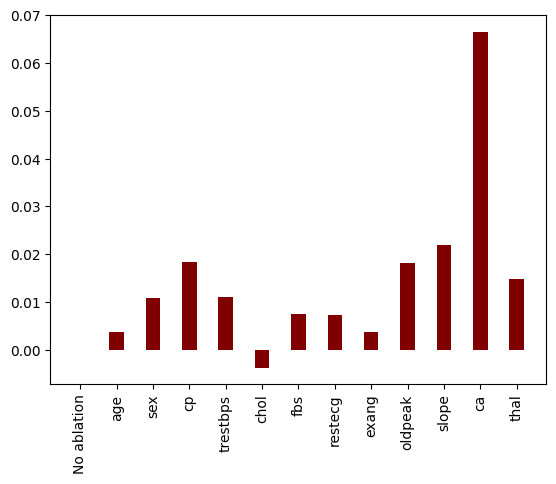

In [13]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [14]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of random_forest)
**************************************
Feature 1.ca, drop in acc 0.06653198653198666
Feature 2.slope, drop in acc 0.021952861952861946
Feature 3.cp, drop in acc 0.018451178451178607
Feature 4.oldpeak, drop in acc 0.018249158249158293
Feature 5.thal, drop in acc 0.014814814814814947
Feature 6.trestbps, drop in acc 0.011111111111111294
Feature 7.sex, drop in acc 0.01090909090909098
Feature 8.fbs, drop in acc 0.007407407407407529
Feature 9.restecg, drop in acc 0.007340067340067424
Feature 10.age, drop in acc 0.0037037037037038756
Feature 11.exang, drop in acc 0.0037037037037038756
Feature 12.chol, drop in acc -0.0037037037037034315


# Pearson Correlation Matrix
Utilizing the libraries seaborn and matplotlib, we'll create correlation matrix plot reliant on a heatmap to indicate how heavily correlated two features are.

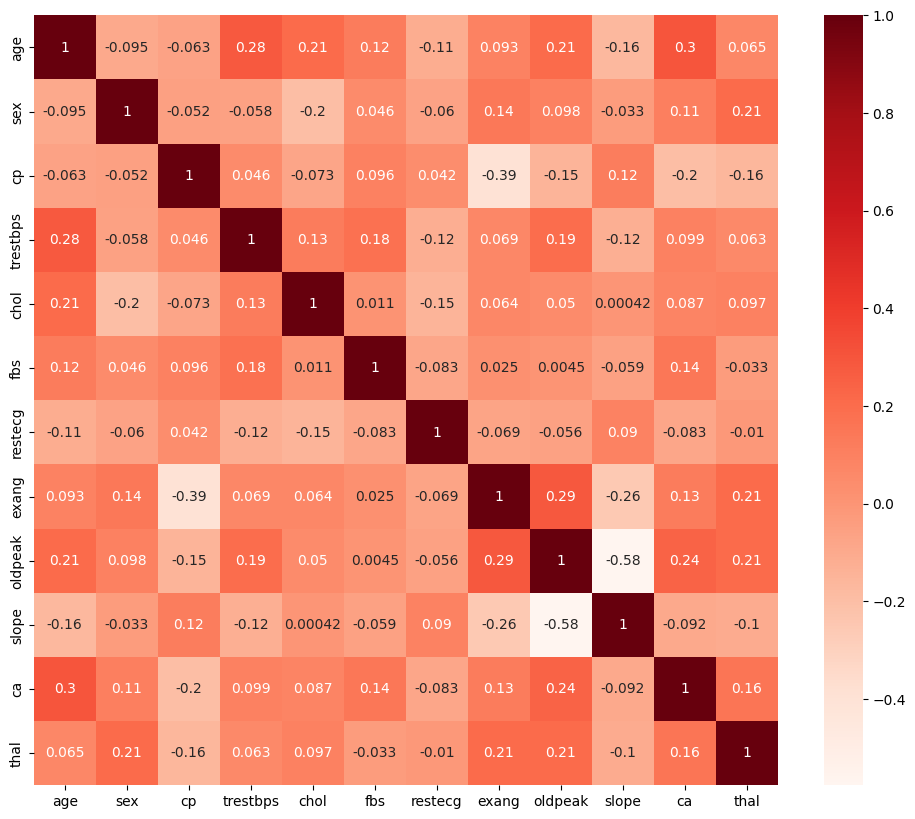

In [15]:
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
    
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
cor = heart_features_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Predicting whether user will get heart attack based on provided data
Model: Logistic Regression Classification

In [16]:
import PySimpleGUI as sg

# Split the dataset into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train a logistic regression model on the dataset
model = LogisticRegression().fit(X, y)

# Define the feature names and their input types
feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
input_types = ["int", "int", "int", "int", "int", "int", "int", "int",
               "int", "float", "int", "int", "int"]

# Define the layout of the GUI
layout = [[sg.Text("Enter the values for the following features:")]]
for name, type_ in zip(feature_names, input_types):
    layout.append([sg.Text(name), sg.Input(key=name, size=(10, 1))])
layout.append([sg.Button("Predict"), sg.Exit()])

# Create the GUI window
window = sg.Window("Heart Disease Prediction", layout)

# Define a function to predict the target based on the input features
def predict_target(features):
    X_new = pd.DataFrame([features], columns=feature_names)
    y_pred = model.predict(X_new)
    if y_pred[0] == 0:
        sg.popup("You are not likely to get a heart attack.")
    else:
        sg.popup("You are likely to get a heart attack.")

# Process the events in the GUI
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == "Exit":
        break
    features = []
    for name, type_ in zip(feature_names, input_types):
        value = values[name]
        if type_ == "int":
            value = int(value)
        elif type_ == "float":
            value = float(value)
        features.append(value)
    predict_target(features)

# Close the GUI window
window.close()

/Users/MaaheKazmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Display the learned coefficients (i.e., weights) of each feature
for name, coef in zip(feature_names, model.coef_[0]):
    print(f"{name}: {coef}")

age: 0.015061180840178937
sex: -1.2385743533116313
cp: 0.7928419733112462
trestbps: -0.017630884848537
chol: -0.0028172769168957773
fbs: -0.056323145438620395
restecg: 0.494636775926338
thalach: 0.031924472704033285
exang: -0.7443710937469523
oldpeak: -0.49840288729483356
slope: 0.48676328859603535
ca: -0.7688111927472191
thal: -0.9044237109741485


### Classification report

In [18]:
# Generating classification report with precision, recall, f1-score

# Use the trained model to predict the target variable for the entire dataset
y_pred = model.predict(X)

# Generate a classification report
target_names = ["Not having heart attack", "Having heart attack"]
print(classification_report(y, y_pred, target_names=target_names))


                         precision    recall  f1-score   support

Not having heart attack       0.91      0.78      0.84       138
    Having heart attack       0.83      0.93      0.88       164

               accuracy                           0.86       302
              macro avg       0.87      0.85      0.86       302
           weighted avg       0.87      0.86      0.86       302



### Computing ROC curve

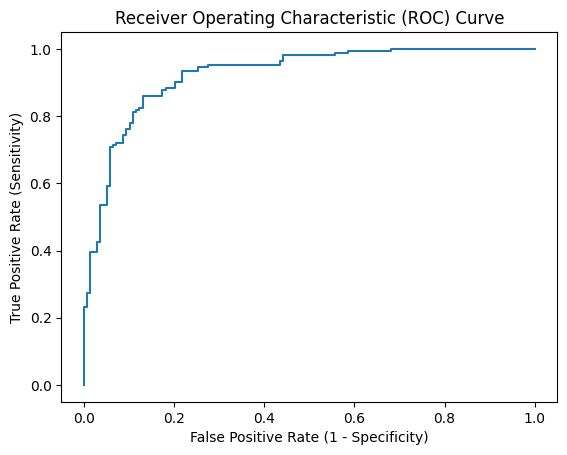

In [19]:
from sklearn.metrics import roc_curve

# Generate predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X)[:,1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

### Getting best threshold values from the ROC curve

In [20]:
# Print threshold, TPR, and FPR for each point on the curve
for i in range(len(thresholds)):
    print(f"Threshold = {thresholds[i]:.4f}, TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}")
    
optimal_idx = numpy.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold value is:", optimal_threshold)

Threshold = 1.9953, TPR = 0.0000, FPR = 0.0000
Threshold = 0.9953, TPR = 0.0061, FPR = 0.0000
Threshold = 0.9532, TPR = 0.2317, FPR = 0.0000
Threshold = 0.9531, TPR = 0.2317, FPR = 0.0072
Threshold = 0.9332, TPR = 0.2744, FPR = 0.0072
Threshold = 0.9331, TPR = 0.2744, FPR = 0.0145
Threshold = 0.9129, TPR = 0.3963, FPR = 0.0145
Threshold = 0.8995, TPR = 0.3963, FPR = 0.0290
Threshold = 0.8886, TPR = 0.4268, FPR = 0.0290
Threshold = 0.8828, TPR = 0.4268, FPR = 0.0362
Threshold = 0.8393, TPR = 0.5366, FPR = 0.0362
Threshold = 0.8358, TPR = 0.5366, FPR = 0.0507
Threshold = 0.8053, TPR = 0.5915, FPR = 0.0507
Threshold = 0.8036, TPR = 0.5915, FPR = 0.0580
Threshold = 0.7453, TPR = 0.7073, FPR = 0.0580
Threshold = 0.7411, TPR = 0.7073, FPR = 0.0652
Threshold = 0.7409, TPR = 0.7134, FPR = 0.0652
Threshold = 0.7332, TPR = 0.7134, FPR = 0.0725
Threshold = 0.7330, TPR = 0.7195, FPR = 0.0725
Threshold = 0.7317, TPR = 0.7195, FPR = 0.0870
Threshold = 0.7239, TPR = 0.7439, FPR = 0.0870
Threshold = 0